# Introduction

The English Premier League is among the world's most popular sporting leagues. I have followed it for almost a decade. The competition was officially founded in 1992 by the English Football Association and has blossomed into the most competitive soccer league in the world. With any sport, there is a large market for betting in the league. As an avid soccer fan who has played soccer his entire life, I want to know if I can beat the odds using Machine Learning.



<img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/800px-Premier_League_Logo.svg.png" alt="Alternative text" />


## What are we trying to do?

For a given premier league matchup, I want to use past results and match statistics to make an educated prediction as to whether or not a team will win a match. The aim is to build a machine learning model that can do this. Ideally I would want people people to use this algorithim to have the upper hand in anything they desire.. (i.e., betting, bragging rights, or whatever they please!)


## Project Roadmap

Now that we have an idea of what we want to do on a high level, lets break-down the plan of action in building the best model for the task! The project roadmap for our analysis will begin with data cleaning and manipulation, followed by exploratory data analysis to gain insight into our predictor variables. Our objective is to use other predictors to predict a binary class variable, "Result," which will detail whether a team wins, loses, or draws in a football match. We will then perform a training/test split, implement 10-fold cross-validation, and compare the performance of different models such as Logistic Regression, Decision Tree, and Random Forest. The model with the highest performance will be chosen, and its performance will be analyzed on the testing dataset.



<img src='https://media.tenor.com/Ndwx8Nv1x8oAAAAC/phil-jones-header.gif' />

# Exploratory Data Analysis and Cleaning 

## Overview of the Data and The Approach

Since there are 20 teams in the league every season, and each team plays the other exactly twice, each team plays 38 match-days. Since we don’t want to double-count matches, the total for each season would be 38 weeks * 10 matches per week= 380 matches. While data is available for seasons dating back to 1995, I am choosing only three seasons to create my model(2020-21, 2021-22, and the current season 2022-2023). I want to do this because I want to be able to predict the most up-to-date matches, and data that is decades old will not tell us much about a team’s current form. 

I mentioned not wanting to have repeat matches, but the only way to scrape my dataset from its original source was by scraping all matches for every team meaning we have both the home side and the away side of the match. This means when we run our algorithim there is a possibility that in the first instance of the match it predicted the home team won, but the second time around it could say the second team won. This is not a huge issue as we can merge both sides of the data to get both iterations of the match instead of just one, allowing us to improve our accuracy.


In [430]:
#Just a few of the many imports to come

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg')
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 



In [431]:
# Loading the dataset
df = pd.read_csv("prem_2023.csv", index_col=0)


df.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,xg_y,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,NaN,10.0,2.0,14.6,1.0,0.0,0.0,1.0,2023,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,NaN,19.0,7.0,13.0,0.0,0.0,0.0,2.7,2023,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,NaN,14.0,6.0,14.8,0.0,0.0,0.0,1.3,2023,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,NaN,22.0,8.0,15.5,1.0,0.0,0.0,2.6,2023,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,NaN,22.0,8.0,16.3,1.0,0.0,0.0,2.4,2023,Arsenal


Note that the "prem_2023.csv" is a dataset that I scraped myself from fbref.com which is a popular websire for match statistics. The code for the web-scraping and initial cleaning can be found as .py file in my project file. Feel free to reference it if interested!

link to original website that housed my data: <a  href="fbref.com">link</a>

### Understanding Our Outcome Variable

The column that we are interested in is the "result" column in our dataset which has character values 'W' for win, 'L' for loss, and 'D' for draw. I am only interested in predicting the liklehood of a certain team winning and I believe the model has higher potential for accuracy while maintaining simplicity by simply converting this column into a new-column with a binary representation coding 'W' with a 1 and 0 to represent a 'D' or 'L'. 

## Data Cleaning

Some of the initial cleaning was done in the web-scraping script including making all the columns lower case, merging the shootinhg data with the match data, and other cleaning related to how the data was originally formatted in an HTML table. Now we can focus on converting certain categorical columns to binary columns that can be used either as predictors or outcome variables and convert all non-numeric columns we are interested in using into numeric.

In [372]:
#Drop any duplicate columns, I accidently scraped two expected goals columns so I am simply removing one of them
df = df.drop('xg_y', axis=1)

df = df.rename(columns={'xg_x':'xg'})

In [373]:
#make the opponents each have a numeric value in a new column
df["opp_num"] = df["opponent"].astype("category").cat.codes

In [374]:
#create new hour column
df["hour"] = df["time"].str.replace(":.+","", regex=True).astype("int")

In [375]:
#convert the venue column into a new column venue_code column which is numeric
#so we can use it as a predictor since it has binary values 0 or 1
df["venue_num"] = df["venue"].astype("category").cat.codes

In [376]:
#Convert match results into numeric
df["result_factor"]= (df["result"] == "W").astype("int")

In [377]:
#Convert date to numerical variable
df["date"] = pd.to_datetime(df["date"])
df["day_code"] = df["date"].dt.dayofweek

In [378]:
#Sort final dataframe by date
df = df.sort_values(by="date")

In [379]:
#checking for missing values
df.isna().sum()

date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance        702
captain             0
formation           0
referee             0
match report        0
notes            2042
sh                  0
sot                 0
dist                1
fk                  0
pk                  0
pkatt               0
season              0
team                0
opp_num             0
hour                0
venue_num           0
result_factor       0
day_code            0
dtype: int64

Luckily, the missing values are in irrelavant columns such as match notes, and attendance which I was not planning on using in my analysis anyway. We can remove these columns from our dataframe as well. 

In [380]:
df = df.drop(columns=['attendance', 'notes'])


In [381]:
#Now that our data is cleaned, we can save it as a new dataframe
df.to_csv("prem_2023_cleaned.csv")

In [382]:
#Lets find the dimensions of our data
df.shape

(2042, 30)

#### Now we can load our final cleaned dataset and call it a variable "matches"

In [383]:
matches = pd.read_csv("prem_2023_cleaned.csv", index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,opp_num,hour,venue_num,result_factor,day_code
1,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3.0,0.0,Fulham,...,2.0,0.0,0.0,2021,Arsenal,9,12,0,1,5
0,2020-09-12,20:00,Premier League,Matchweek 1,Sat,Home,L,0.0,2.0,Newcastle Utd,...,0.0,0.0,0.0,2021,West Ham United,15,20,1,0,5
0,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Away,L,3.0,4.0,Liverpool,...,1.0,0.0,0.0,2021,Leeds United,12,17,0,0,5
0,2020-09-12,20:00,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,West Ham,...,1.0,0.0,0.0,2021,Newcastle United,23,20,0,1,5
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,0.0,2.0,2.0,2021,Liverpool,10,17,1,1,5


## Visualizations and EDA

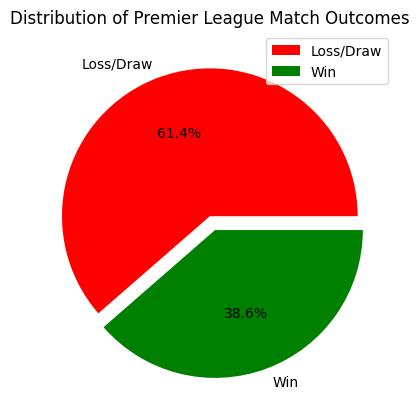

In [384]:
#Univariate Visualization: All wins vs losses/draws

counts = df['result_factor'].value_counts()
labels = ['Loss/Draw', 'Win']
colors = ['red', 'green']
explode = (0, 0.1)

plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.legend(labels)
plt.title('Distribution of Premier League Match Outcomes')
plt.show()


This approximately 60-40 split is good because our data is not extemely uneven which will make classifying wins vs losses/draws easier for our models.

### Let's take a look at all our variables before we dive into their correlations

* date: The date of the match.
* time: The time of the match.
* comp: The competition of the match.
* round: The round of the match.
* day: The day of the match.
* venue: The venue of the match.
* result: The result of the match.
* gf: The number of goals scored by the team.
* ga: The number of goals conceded by the team.
* opponent: The name of the opposing team.
* xg: The expected goals of the team.
* xga: The expected goals conceded by the team.
* poss: The possession of the team.
* captain: The name of the team captain.
* formation: The formation used by the team.
* referee: The name of the match referee.
* match report: The link to the match report.
* sh: The number of shots taken by the team.
* sot: The number of shots on target by the team.
* dist: The distance of the shots taken by the team.
* fk: The number of free kicks taken by the team.
* pk: The number of penalties scored by the team.
* pkatt: The number of penalties attempted by the team.
* season: The season of the match.
* team: The name of the team.
* opp_num: The numerical representation of the opposing team.
* hour: The hour of the match.
* venue_num: The numerical representation of the venue.
* result_factor: The binary representation of the match result.
* day_code: The numerical representation of the day.


### Variable Correlation Plot

Even though using my knowledge of soccer and some logical reasoning I already have a rough idea of what predictors I want to use, let's make a variable correlation plot for all the numerical predictors to see if there's some relationships we haven't thought of yet.

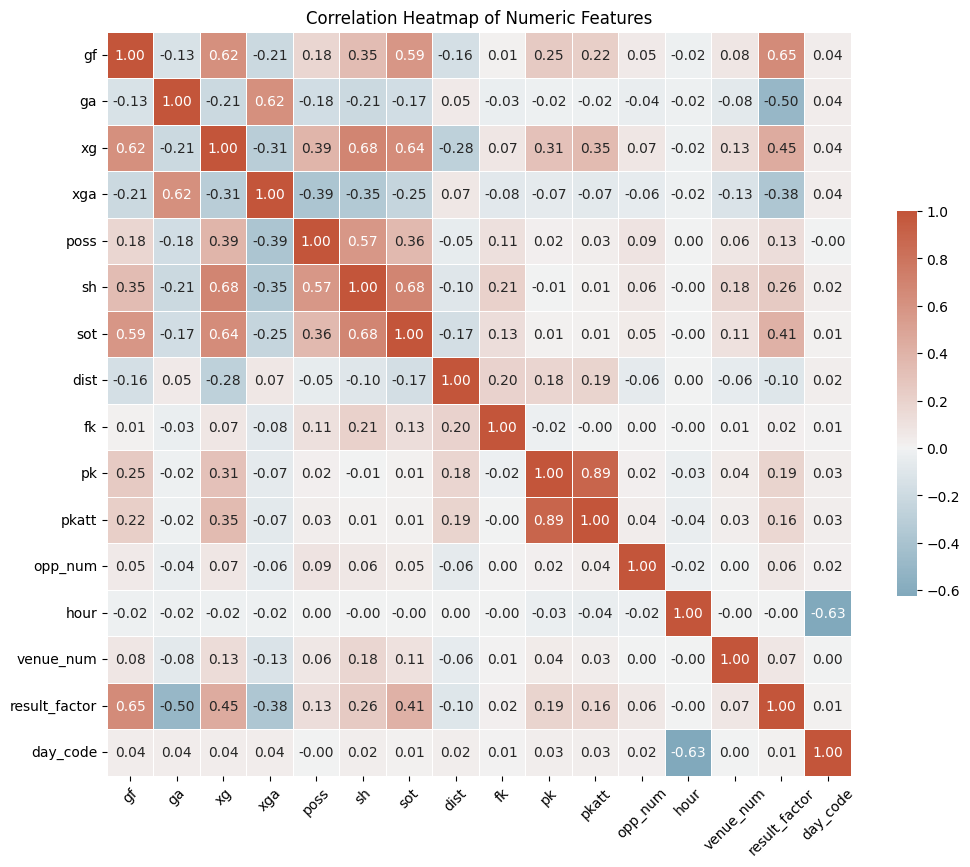

In [385]:

num_cols = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'opp_num', 'hour', 'venue_num', 'result_factor', 'day_code']

# Calculate the correlation matrix
corr = df[num_cols].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a title
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()


At first glance this may seem like a lot to look at, but it seems that most of these predictors actually don't have much correlation between them. Some exceptions include columns like pk and pkatt which has a 0.89 correlation with one another but this makes sense as penalty kick attempts will obviously be correlated with penality kicks scored and the same can be said about shots(sh) and shots on target(sot). This does mean both those columns could explain similar variation so choosing just one or the other as our final predictor could be useful.

## Selecting Predictors

Based on knowledge of the game of soccer as well as the correlation heatmap above, some intial predictors I am interested in are xg(expected goals), xga(expected goals against), venue_num(home or away team), and opp_num(numeric represenation of the opponent team). Let's make some visualizations of these predictors to see how useful they are in predicting the outcome of matches.

### Expected Goals

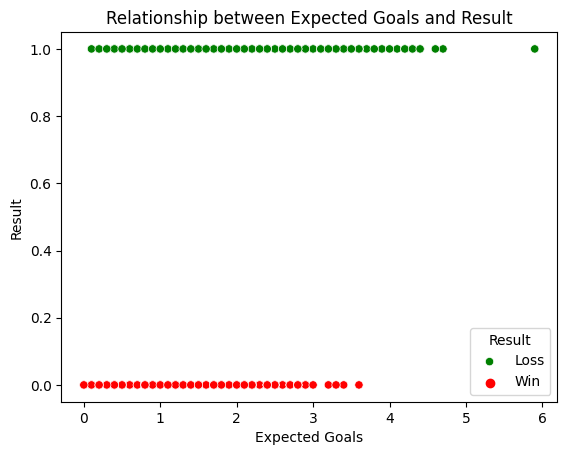

In [ ]:
#Scatterplot of expected goals 
sns.scatterplot(x='xg', y='result_factor', hue='result_factor', data=df, 
                palette=['red', 'green'], legend='full')
plt.xlabel('Expected Goals')
plt.ylabel('Result')
plt.title('Relationship between Expected Goals and Result')
plt.legend(title='Result', loc='lower right', labels=['Loss', 'Win'])
plt.show()

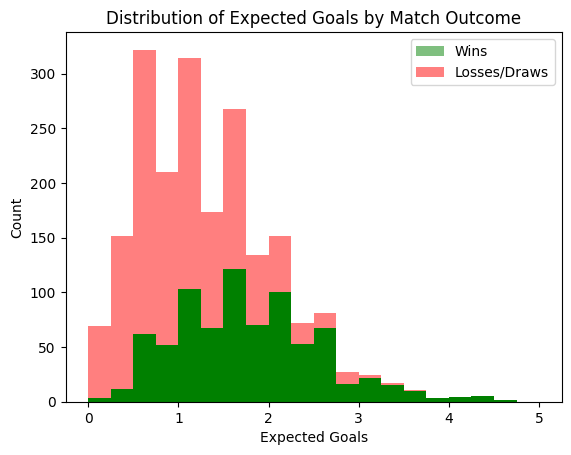

In [ ]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink'])
# Split the data into wins and losses/draws
win_data = df[df['result_factor'] == 1]
loss_draw_data = df[df['result_factor'] == 0]

bin_edges = np.linspace(0, 5, 21)

# Plot the expected goals for wins
plt.hist(win_data['xg'], bins=bin_edges, alpha=0.5, color='green', label='Wins')

# Plot the expected goals for losses/draws, stacked on top of the wins
plt.hist(loss_draw_data['xg'], bins=bin_edges, alpha=0.5,color='red', label='Losses/Draws', bottom=plt.hist(win_data['xg'], bins=bin_edges)[0])

# Add axis labels and a title
plt.xlabel('Expected Goals')
plt.ylabel('Count')
plt.title('Distribution of Expected Goals by Match Outcome')

# Add a legend
plt.legend()
# Show the plot
plt.show()

### Shots on Target(SOT)

We are very interested in shots on target as a potential predictor

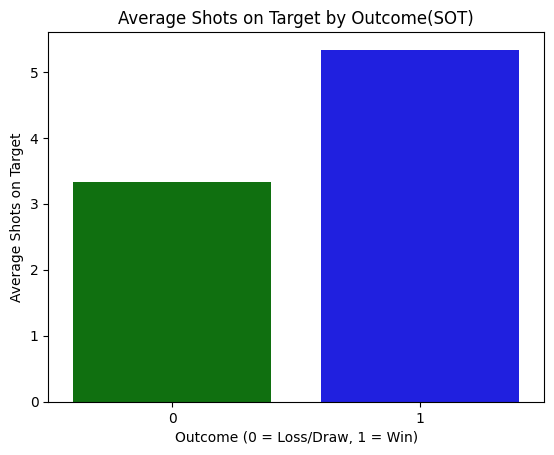

   result_factor       sot
0              0  3.334928
1              1  5.335025


In [ ]:
#Get a new dataframe of average shots on target that we are interested in plotting
sot_by_outcome = matches.groupby('result_factor')['sot'].mean().reset_index()


# Create a bar chart of the average SOT for each outcome
sns.barplot(x='result_factor', y='sot', data=sot_by_outcome)
plt.title('Average Shots on Target by Outcome(SOT)')
plt.xlabel('Outcome (0 = Loss/Draw, 1 = Win)')
plt.ylabel('Average Shots on Target')
plt.show()

print(sot_by_outcome)


The average shots on target for a losing or drawing team is around 3.3 shots while the average in a winning outcome is over 5.3 shots. We could conduct a statistical test to determine whether this difference in means is significant, but even just visually we can see that winning teams tend to have higher shots on target which makes inituitive sense. If a team has more clear on target shots on goal, their probability of actually scoring will also increase.

### Venue

Home or Away advanatge is real in every sport, and it is no different in soccer. Based on the correlation plots as well as common knowledge I believe this is a good predictor to expirment with.


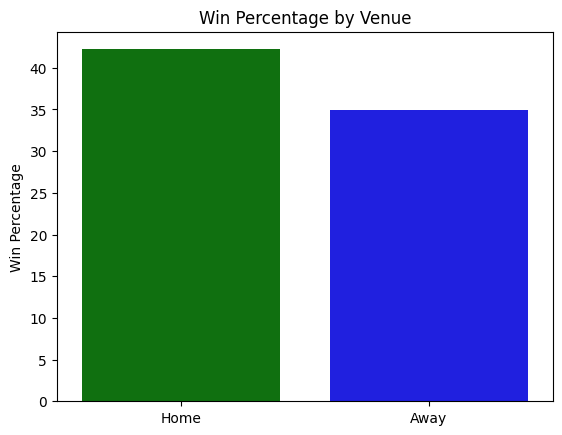

In [ ]:
win_pct = df.groupby('venue_num')['result_factor'].mean() * 100

# Create a bar plot
home_win_pct = (df[df['venue_num'] == 1]['result_factor'] == 1).mean() * 100
away_win_pct = (df[df['venue_num'] == 0]['result_factor'] == 1).mean() * 100

# Create a bar plot to visualize the win percentages
sns.barplot(x=['Home', 'Away'], y=[home_win_pct, away_win_pct])
plt.title('Win Percentage by Venue')
plt.ylabel('Win Percentage')
plt.show()


As we can see home teams seem to have an overall higher win percentage, and since the goal was to predict wins as accurately as possible, this could be a reasonable metric to use.

### Opponent Number(opp_num)

This is a numeric from 1-20 that uniquely identifies each team in the league. We are interested in this as a metric because we can see if some teams are more likely to win given a particular season or their overall season/record.

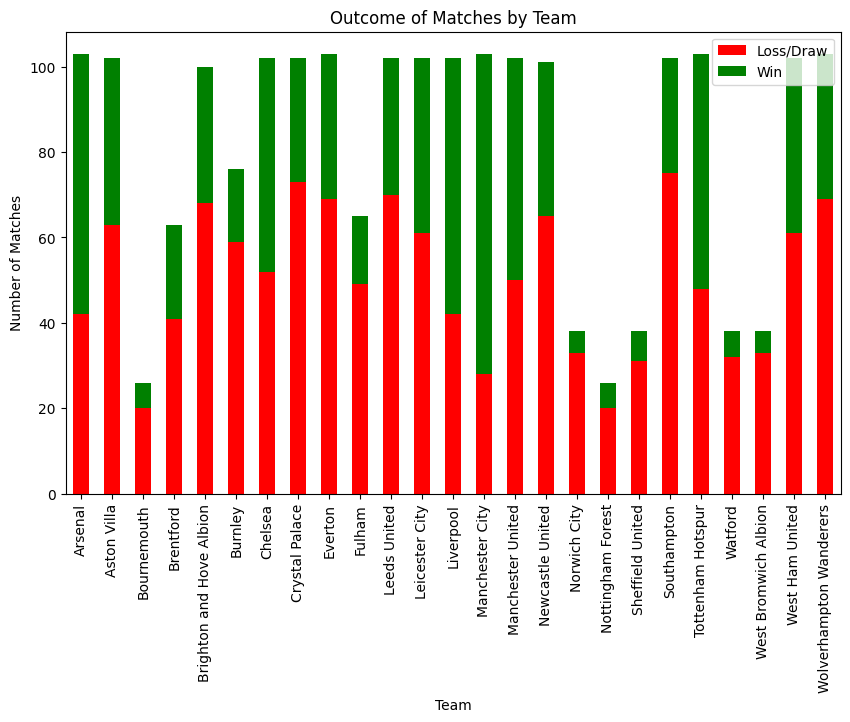

In [ ]:

team_outcomes = matches.groupby(['team', 'result_factor']).size().unstack(fill_value=0)

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
team_outcomes.plot(kind='bar', stacked=True, ax=ax, color=['red','green'])

# Set the axis labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Number of Matches')
ax.set_title('Outcome of Matches by Team')

# Set the legend labels
ax.legend(['Loss/Draw', 'Win'], loc='upper right')

Note that this this bar plot shows the actual team-names instead of the numeric coded ones that we use when actually predicting our outcome in out models. What we can see from this chart is that some teams have considerabily more wins over time than others in the league. This means using their numeric representations as a predictor could prove useful in our model.

# Setting Up Our Models

## Train Test Split

I have data for 2 entire seasons and until March of this 2022-2023 season. One approach is to split the traning data into two full seasons we have and the testing data to be the partial 3rd season. However, this approach may too closely fit the first two seasons and be unable to accurately predict matchups in the third season that could have been a result of bad team form, certain transferred players, and other extraneous factors. Furthermore, since we are dealing with time series data where the chronology is important, we can use a technique like calculating rolling averages of certain continuous numeric predictors.

I decided on using the full 2020-21 season for data as well as the first half of the 2021-22 season as my training data which gives me a roughly 60-40 split of train to test. I opted for this for the above reasons and also due to testing out different splits with multiple models and comparing accuracy scores.

In [ ]:
#Initial Data Split
train = matches[matches["date"]<'2022-01-01']
test = matches[matches["date"] >'2022-01-01']

## Time Series Cross Validation
Since my data follows a chronological order of continuous match dates, the order matters when trying to predict future outcomes. For this reason we cannot use traditional cross-validation and must use time-series cross validation in all of our models to clear any doubts of imbalanced data and to reduce possible variance in the accuracy. To perform time series cross-validation, you would divide the data into smaller time intervals, such as monthly or quarterly periods. Then, for each time interval, you would use the data from the previous periods as training data and the data from the current period as testing data. So in our case after our intial data split,we would split the training set into smaller 

# Model Building

### Approach

 Since this is a classification problem, there are a handful of useful machine models I can choose to model the situation including different tree algorithims, logistic regression, k-nearest neighbors, and even support vector machines. For all these models I plan on using the same set of initial predictors, but planning on trying to optimize my final selected model further by adding some rolling averages as predictors to increase accuracy.

# Random Forests Classifier Model

### Discussion of Parameters for this model

`n_estimators`: The number of trees in the forest. Increasing the number of trees can improve the model's performance, but it also increases the computation time.

`max_depth`: The maximum depth of the tree. A deeper tree can better fit the training data, but it can also overfit and generalize poorly to new data. A value of None means that the nodes are expanded until all the leaves are pure or until they contain less than min_samples_split samples.

`min_samples_split`: The minimum number of samples required to split an internal node. A higher value will prevent the tree from splitting nodes with very few samples, which can help reduce overfitting.

We are using the GridSearch method from sklearn to tune these parameters and give us the best parameters to maximize model accuracy.


In [454]:
### All of our imports for the Random Forests Model
import warnings
from sklearn.metrics import accuracy_score, precision_score
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,cross_val_score


In [455]:
#some predictors we are interested in using, decided by looking at correlation matrices + knowledge of the game
predictors = ["venue_num","opp_num", "xg","poss","xga"] 

In [456]:
#Create the random forests model
model = RandomForestClassifier(random_state=1)

In [457]:
#Time Series Split object that allows us to perform time series cross validation
tscv = TimeSeriesSplit(n_splits=5)


In [611]:
# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [3,5,7,10,None]
}

# Use grid search cross-validation to find the best parameters for our final model
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv)
grid_search_rf.fit(train[predictors], train["result_factor"])

print("Best parameters: ", grid_search_rf.best_params_)

print("roc_auc_scores: ", grid_search_rf.cv_results_['mean_test_score'])

Best parameters:  {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}
roc_auc_scores:  [0.72513369 0.73048128 0.72727273 0.72941176 0.73048128 0.72727273
 0.73262032 0.72834225 0.72513369 0.7315508  0.72834225 0.72620321
 0.73903743 0.7368984  0.73582888 0.73475936 0.73262032 0.7368984
 0.73903743 0.73903743 0.73475936 0.73368984 0.7368984  0.73368984
 0.7368984  0.73262032 0.72834225 0.74331551 0.7368984  0.7368984
 0.73796791 0.72941176 0.73582888 0.7315508  0.73262032 0.7315508
 0.71657754 0.72406417 0.72620321 0.72727273 0.73262032 0.7368984
 0.73368984 0.7368984  0.73475936 0.7315508  0.7315508  0.73262032
 0.72727273 0.72085561 0.72727273 0.73368984 0.73262032 0.7315508
 0.72834225 0.73582888 0.73262032 0.72727273 0.73048128 0.72941176]


In [607]:
#Now have to retune model with the best parameters
rf_model = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                               min_samples_split=grid_search_rf.best_params_['min_samples_split'],
                               max_depth=grid_search_rf.best_params_['max_depth'],
                               random_state=1)

In [608]:
#Find cross-validation scores

scores = cross_val_score(rf_model, train[predictors], train["result_factor"], cv=tscv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.75935829 0.7486631  0.70053476 0.74331551 0.76470588]
Mean cross-validation score:  0.7433155080213903


[{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}, {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}, {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}, {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}, {'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 50}, {'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 200}, {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}, {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}, {'max_depth': 5, 'min_samples_split': 5, 'n_estimator

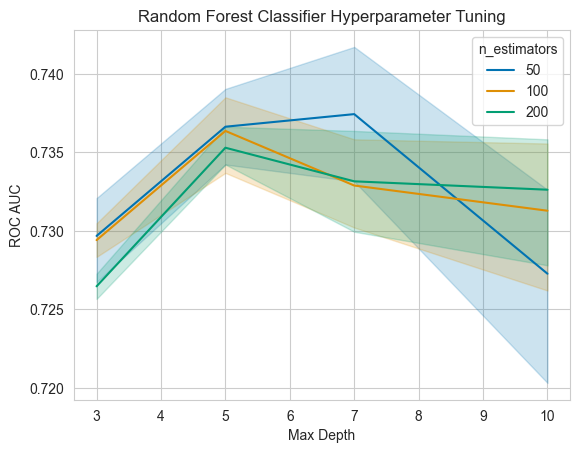

In [614]:
# Extract relevant data from grid search results
results = grid_search_rf.cv_results_
params = results['params']
print(params)
mean_test_scores = results['mean_test_score']

# Create a dataframe of the mean test scores with their corresponding parameters
df = pd.DataFrame.from_dict(params)
df['mean_test_score'] = mean_test_scores

# Plot the results using seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.lineplot(x='max_depth', y='mean_test_score', data=df, hue='n_estimators', palette='colorblind', ax=ax)
ax.set_xlabel('Max Depth')
ax.set_ylabel('ROC AUC')
ax.set_title('Random Forest Classifier Hyperparameter Tuning')
plt.show()

# Random Forest Plot

In our random forest, we tuned the parameters max_depth which represents the max depth of each tree, n_estimators which represents the number of trees in the model, and min_samples_split that controls how many samples are required to split a node further. 

The graph shows that the best mean ROC AUC scores are achieved when max_depth is set to 7 or None and min_samples_split is set to 5 or 10. Increasing the value of max_depth beyond 7 seems to result in slightly lower ROC AUC scores. Overall, the graph shows a relatively small range of ROC AUC scores across the different combinations of hyperparameters, indicating that the model is not very sensitive to these particular hyperparameters. However, it's still important to select the best hyperparameters for optimal performance.

# Logistic Regression Time!
Let's try building a Logistic Regression Model using similar predictors. Since we have a binary outcome variable, and we have numerous continuous numeric predictors this type of model has potential to work well on our dataset of premier league data.

### Understanding the parameters of the model

`C`: The parameter C in logistic regression controls the trade-off between fitting the model well to the training data and preventing overfitting. Smaller values of C mean that the model puts more emphasis on avoiding overfitting, which can be helpful when the data is limited or noisy. This helps to ensure that the model doesn't memorize the training data and can generalize well to new, unseen data. On the other hand, larger values of C allow the model to better fit the training data, which can be helpful when the data is plentiful and reliable. However, this can also lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new data.

`penalty`: The penalty parameter in logistic regression allows you to choose between L1 and L2 regularization, and control the strength of the regularization. A smaller penalty parameter means stronger regularization, which reduces the influence of individual features on the model and prevents overfitting. A larger penalty parameter means weaker regularization, which allows the model to fit the training data more closely, but may lead to overfitting.

The GridSearchCV object is used to perform hyperparameter tuning. It takes the logistic regression model, parameter grid, and number of cross-validation folds (cv=5) as input.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [564]:

#split by date again, notice how we are using the new version of the matches df with rolling avgs
train_df = matches_rl[matches_rl["date"]<'2022-01-01']
test_df = matches_rl[matches_rl["date"] >'2022-01-01']

#Time Cross Validation Split
tscv = TimeSeriesSplit(n_splits=5)



In [565]:
#Initialize list to store accuracy scores accross folds, as well as models
accuracy_scores=[]
models=[]

from sklearn.metrics import roc_auc_score


In [566]:
for train_index, test_index in tscv.split(train_df):

    # Split the data into training and test sets for this fold
    X_train, X_test = train_df.iloc[train_index][predictors+new_cols], train_df.iloc[test_index][predictors+new_cols]
    y_train, y_test = train_df.iloc[train_index]['result_factor'], train_df.iloc[test_index]['result_factor']

    #Define paramter grid for tuning
    param_grid = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']},


    # Create the grid search object
    grid_search_log = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                         param_grid,
                         cv=5,
                         n_jobs=-1)

    grid_search_log.fit(X_train, y_train)

    #Create predictions on test data using the best model post cross-validation and tuning
    y_pred = grid_search_log.best_estimator_.predict(X_test)

    # Calculate the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list, as well as the model
    accuracy_scores.append(accuracy)
    models.append(model)

mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print('Mean accuracy accross all folds:', mean_accuracy)
print("All Accuracy Scores:", accuracy_scores)

332755.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
332755.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Mean accuracy accross all folds: 0.7417142857142857
All Accuracy Scores: [0.7314285714285714, 0.7485714285714286, 0.7314285714285714, 0.7771428571428571, 0.72]


[0.74063636 0.73723377 0.73837662 0.7361039  0.73724026 0.73724026]


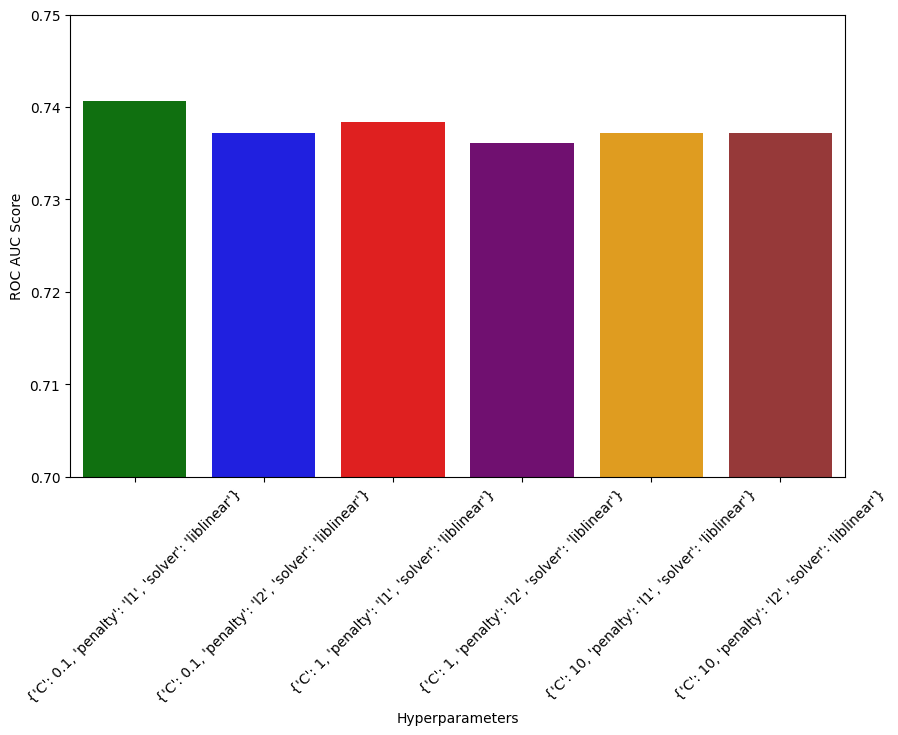

In [402]:
params = grid_search_log.cv_results_['params']
roc_auc_scores = grid_search_log.cv_results_['mean_test_score']

# Convert the hyperparameters to a list of strings for plotting
params_str = [str(p) for p in params]

# Create a dataframe with the hyperparameters and test scores
results_df = pd.DataFrame({'Hyperparameters': params_str, 'ROC AUC Score': roc_auc_scores})

fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn to create a barplot of the test scores for each set of hyperparameters
sns.barplot(x='Hyperparameters', y='ROC AUC Score', data=results_df, ax=ax)

ax.set_ylim(0.7, 0.75)

print(roc_auc_scores)
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Results from the Logistic Regression Model

All of our models have similar ROC-AUC values of around 0.73, which is fair for an algorithim of this nature. It means it is reasonably good as effectively classifying wins as 1 and losses/draws as 0 like its supposed to. Compared to our 

# Support Vector Machine Model

In [407]:
from sklearn import svm
from sklearn.svm import SVC

### Understanding the parameters of the model

`kernel`: This parameter specifies the kernel function to be used by the SVM. The kernel function maps the input data to a higher-dimensional feature space where the data is more separable. If the data is linearly seperable, i.e the data can be seperated by a straight line or a hyperplane, we say it is linearly seperable and a 'linear' kernel can be used otherwise the 'rbf' kernal is more suitable.

`gamma`: This parameter controls the shape of the decision boundary. Smaller values of gamma lead to a more general decision boundary that may smooth over the data, while larger values of gamma lead to a more complex and detailed decision boundary that can better fit the training data. 

In [408]:
train_df = matches[matches["date"] < '2022-01-01']
test_df = matches[matches["date"] >= '2022-01-01']

X_train = train_df[predictors]
y_train = train_df['result_factor']
X_test = test_df[predictors]
y_test = test_df["result_factor"]

# Define the SVM model
svm_model = svm.SVC()

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define the time series cross-validation object
time_series_cv = TimeSeriesSplit(n_splits=10)

# Create the GridSearchCV object to tune our parameters
grid_search_svm= GridSearchCV(svm_model, param_grid, cv=time_series_cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_model = grid_search.best_estimator_






Fitting 10 folds for each of 12 candidates, totalling 120 fits


294024.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
294024.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C

[0.74313725 0.61862745 0.74313725 0.61862745 0.74411765 0.61862745
 0.74411765 0.63627451 0.73921569 0.73039216 0.73921569 0.61960784]


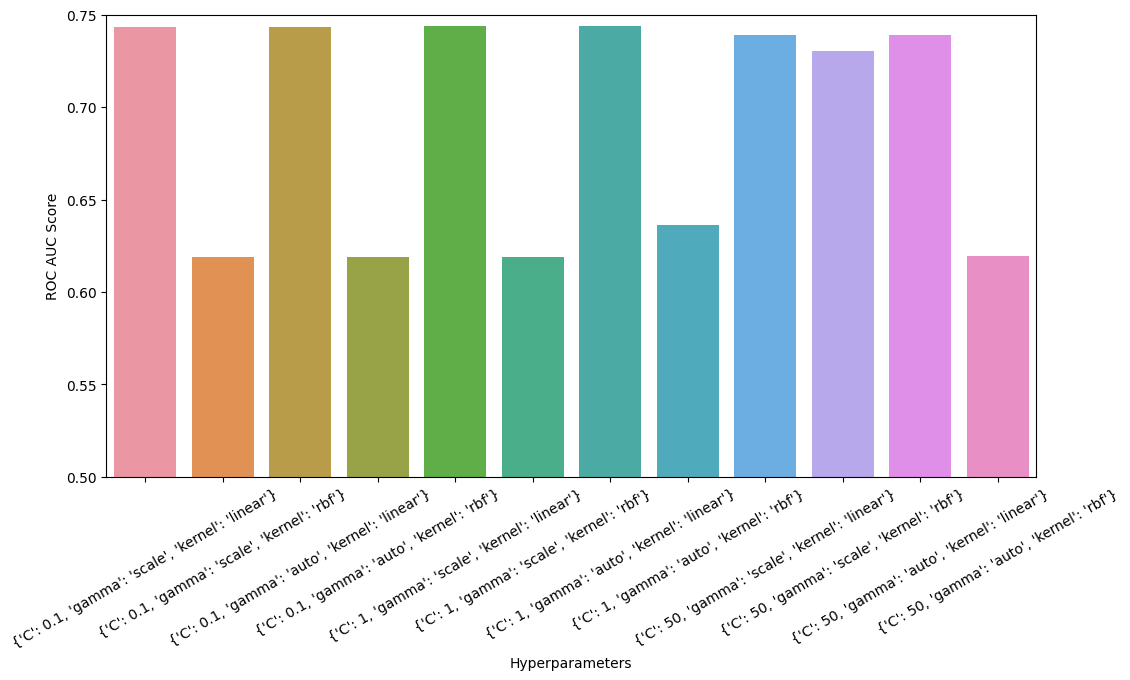

In [594]:
params_svm = grid_search_svm.cv_results_['params']
roc_auc_scores_svm = grid_search_svm.cv_results_['mean_test_score']

# Convert the hyperparameters to a list of strings for plotting
params_svm_str = [str(p) for p in params_svm]

# Create a dataframe with the hyperparameters and test scores
results_df = pd.DataFrame({'Hyperparameters': params_svm_str, 'ROC AUC Score': roc_auc_scores_svm})

fig, ax = plt.subplots(figsize=(12, 6))

# Use Seaborn to create a barplot of the test scores for each set of hyperparameters
sns.barplot(x='Hyperparameters', y='ROC AUC Score', data=results_df, ax=ax)

ax.set_ylim(0.5, 0.75)

print(roc_auc_scores_svm)
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=30)

# Show the plot
plt.show()

### Results from the SVM Model
Although our best models from the bunch had ROC AUC scores comparable to our best models from random forests and logistic regression, there is massive fluctuation in ROC auc score from model as seen in the plot above. This means the model's performance is highly dependent on the hyperparameters we select which means while there is large potential for improvement by fine-tuning these parameters. It also means small change greatly affects our model's ability to generalize to new data.

# KNN Classifier Model

Since this is a classification problem at it's core we can expirment with a K-Nearest Neighbors Classifier model to fit our test data.

### Understanding the parameters of the model

`n_neighbors`: Specifies the number of neighbors to consider when making a prediction

`weights`: This parameter describes how the parameters are weighted

We once again use the GridSearchCV function to search over a range of hyperparameters to find the combination that gives us the highest accuracy on our training data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [569]:
#Split data the same way as we did previously
train_df_knn = matches[matches["date"]<'2022-01-01']
test_df_knn = matches[matches["date"] >'2022-01-01']

#Create training and testing variables
X_train = train_df_knn[predictors]
y_train = train_df_knn['result_factor']
X_test = test_df_knn[predictors]
y_test = test_df_knn["result_factor"]

In [570]:
# Define the hyperparameters to search over
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Define the cross-validation method
time_series_cv = TimeSeriesSplit(n_splits=5)

#Define knn_model
knn_model = KNeighborsClassifier()

# Define the grid search object
grid_search = GridSearchCV(knn_model, param_grid=param_grid, cv=time_series_cv, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean test score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Test Score: ", grid_search.best_score_)

# Get the best model from the grid search object
best_knn_model = grid_search.best_estimator_

# Fit the best model to the training data
best_knn_model.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_knn_model.predict(X_test)



Best Hyperparameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best Test Score:  0.6374331550802139


### Lets Create a graph of our models performance on the test data with ROC AUC score, and different values of n.

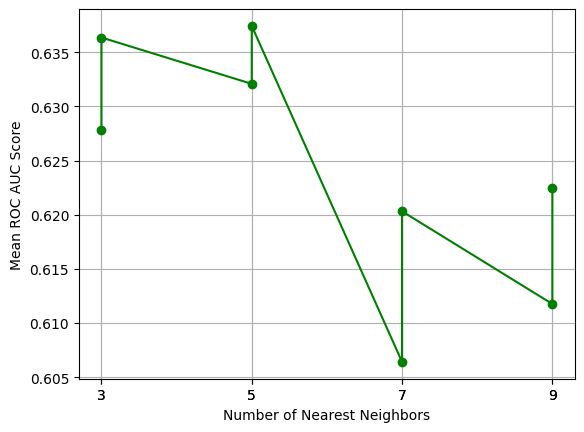

In [ ]:

params = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Extract the values of n_neighbors from the hyperparameters
n_neighbors = [param['n_neighbors'] for param in params]

# Create a plot of n_neighbors vs. ROC AUC score
fig, ax = plt.subplots()
ax.plot(n_neighbors, mean_test_scores, marker='o')
ax.set_xlabel('Number of Nearest Neighbors')
ax.set_ylabel('Mean ROC AUC Score')
ax.set_xticks(n_neighbors)
ax.grid(True)
plt.show()


## Results of the KNN model
As we can see, we achieve the highest ROC AUC score when the number of n=5, with the second highest being when we have n=3. Furthermore, our highest accuracy on the training data is 63.7%, well lower than that of our other models. Probably not going to go with this one :/

## The KNN Model right now:

<img src=https://resources.premierleague.com/premierleague/photo/2016/09/09/d655280a-ec4d-4084-a807-63dd5c69b9af/GettyImages-130010419.jpg>

# Fitting Our Best Models to the Training Set

## Fitting Random Forests Classifier Model

In [491]:
#train final random forest model with all the training data
rf_model.fit(train[predictors], train["result_factor"])

#get predictions for the test data using trained model
predictions = rf_model.predict(test[predictors])

In [598]:
#Find the accuracy score
acc = accuracy_score(test["result_factor"], predictions)
print('Accuracy Score: ', acc)

#Find the precison score
precision = precision_score(test["result_factor"], predictions)
print('Precision Score: ', precision)



Accuracy Score:  0.7384615384615385
Precision Score:  0.7086330935251799


## What does accuracy score and precision score mean?

Accuracy Score and Precision Score will be the metrics of choice when assessing the performance of our models on the actual test data, so it is important to define them in this context.

When we predicted something: i.e win, or a loss/draw 73.5% of the time our model was correct in doing so. This is actually a very good starting place for the algorithim and we can work to improve it from here.

What does the precision score mean?  It means when we predicted a win, the prediction was actually correct 69% of the time. We can try to improve this with a different startegy while still using a random forest classifier algorithim. 

I believe making every team have a "rolling_average" column that uses the last n matches and then uses these averages as predictors can help us improve accuracy and is a modification we can make to this algorithim.

In [493]:
#dataframe combining actual values and predicted values
pred_actual = pd.DataFrame(dict(actual=test["result_factor"], prediction=predictions))

In [597]:
#crosstab = two way table that tells us what actually happened when we made a prediction
pd.crosstab(index=pred_actual["actual"], columns=pred_actual["prediction"])

prediction,0,1
actual,,
0,475,81
1,157,197


As we can see by our cross-tab the random forest model correctly predicted a loss/draw 475 times and incorrectly predicted it 157 times. The model correctly predicted a win 197 times while being incorrect 81 times.

### Rolling Averages


Now we can finally calculate the rolling averages I mentioned earlier. Below is a simple python function that we can use to do this. I chose to include a team's last 3 matches to be the time-span we calculate the averages for but there is certainly room for expirmentation here. We could potentially choose different values for how many matches we want to use for the rolling calculation and see how it affects our model accuracy.

In [538]:
#creates a sub-data frame for each team
grouped_matches = matches.groupby("team") 

In [526]:
#calculating last 3 matches a team played as a rolling average
def r_l(group, cols, new_cols):
    group = group.sort_values("date")
    #closed=left takes out the current week from the rolling avg calculations
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats

    #removes all the rows with missing values to deal witht the edge case of not having >=4 matches
    group = group.dropna(subset=new_cols)

    return group

In [527]:
#These are the predictor columns that we want to calculate rolling averages for
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pkatt"]

new_cols = [f"{c}_rolling" for c in cols]


In [528]:
#Look at our new columns
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pkatt_rolling']

In [529]:
#Create one data frame for each team in our data and apply the rolling averages function to each team's df
matches_rl = matches.groupby("team").apply(lambda x: r_l(x, cols, new_cols))

In [530]:
#Drop the extra index level since we grouped by team 
matches_rl = matches_rl.droplevel("team")

In [531]:
#Assign values from 0-length of df to be our new indices
matches_rl.index = range(matches_rl.shape[0])

In [544]:
#make new prediction function to automate the process

def epl_predict(data, predictors):
    #everything we did before but just all at once in the function
    train = data[data["date"]<'2022-01-01']
    test = data[data["date"] >'2022-01-01']

    model = RandomForestClassifier(random_state=1)

    param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [None]
    }

    # Use time-series cross-validation to find the best parameters
    tscv = TimeSeriesSplit(n_splits=5)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv)
    grid_search.fit(train[predictors], train["result_factor"])
    
    print("Best parameters: ", grid_search.best_params_)

    final_rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               max_depth=grid_search.best_params_['max_depth'],
                               random_state=1)

    #Fit our final model with training data
    final_rf_model.fit(train[predictors], train["result_factor"])
    
    #Create predictions using final model on test set
    predictions = final_rf_model.predict(test[predictors])

    #Make another combined df to compare predicted to actual in a table
    combined = pd.DataFrame(dict(actual=test["result_factor"], predicted=predictions), index=test.index)
    
    #Precision and accuracy scores
    precision = precision_score(test["result_factor"], predictions)
    accuracy = accuracy_score(test["result_factor"], predictions)

    # Use time-series cross-validation to get a more robust estimate of accuracy
    scores = cross_val_score(model, train[predictors], train["result_factor"], cv=tscv)
    print("Cross-validation scores: ", scores)
    print("Mean cross-validation score: ", scores.mean())

    return combined, precision, accuracy


In [548]:
#Call the function and pass in our original predictors as well as new columns of rolling averages to get our various scores
combined, precision_rf, accuracy_rf  = epl_predict(matches_rl, new_cols + predictors)

Best parameters:  {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 200}
Cross-validation scores:  [0.73714286 0.71428571 0.63428571 0.77714286 0.73142857]
Mean cross-validation score:  0.7188571428571429


In [546]:
print("Precision Score: ", precision_rf)

Precision Score:  0.7102473498233216


In [547]:
print("Accuracy Score : ", accuracy_rf)

Accuracy Score :  0.7422566371681416


In [537]:
#The combined dataframe of our predictions and the actual outcome
combined

,actual,predicted
55,0,1
56,1,1
57,1,1
58,1,1
59,1,0
...,...,...
1959,0,0
1960,0,0
1961,0,0
1962,1,0


### Combining Both Sides of a match
As I mentioned earlier, one of the noteworthy aspects of the dataset that I scraped is that I am getting every match for every team which means it has two instances of every fixture. We need to look at how our algorithim did on predicting both sides of the match, as our algorithim could potentially predict that home team would win in the first instance but then also say the away team would win when it comes accross the fixture again.

In [549]:
#Now we can see the date, team, opponent, and result for each team in combined DF
combined = combined.merge(matches_rl[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [550]:
combined

,actual,predicted,date,team,opponent,result
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,1,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,0,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1959,0,0,2023-02-18,Wolverhampton Wanderers,Bournemouth,L
1960,0,0,2023-02-24,Wolverhampton Wanderers,Fulham,D
1961,0,0,2023-03-01,Wolverhampton Wanderers,Liverpool,L
1962,1,0,2023-03-04,Wolverhampton Wanderers,Tottenham,W


In [551]:
class MissingDict(dict):
    __missing__ = lambda self, key: key 

map_values = {
    "Brighton and Hove ALbion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}

mapping = MissingDict(**map_values)

In [552]:
#Lets check if our mapping dictionary works
mapping["Tottenham Hotspur"] # this should return Tottenham

'Tottenham'

In [554]:
#Create a new column with the normalized teams 
combined["new_team"] = combined["team"].map(mapping)

Now that we have created a new team column, we want to use this new_team column with the normalized names and merge it wherever it matches the opponents field. Doing this allows us to lineup both sides of the prediction. We can do this by merging on the date of the match since the same match had to have occured on the same day.

In [555]:
#Combine the combined df with itself
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

Now we can display our merged dataframe that has predictions for both teams. Let's see where our predictions lineup and where they don't

In [556]:
print(merged)

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,1,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,1,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,0,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0,0,2023-02-18,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
827,0,0,2023-02-24,Wolverhampton Wanderers,Fulham,D,Wolves,0,0,Fulham,Wolves,D,Fulham
828,0,0,2023-03-01,Wolverhampton Wanderers,Liverpool,L,Wolves,1,1,Liverpool,Wolves,W,Liverpool
829,1,0,2023-03-04,Wolverhampton Wanderers,Tottenham,W,Wolves,0,0,Tottenham Hotspur,Wolves,L,Tottenham


Now we can look at all of the rows where one team was predicted to win and the other team was predicted to Draw/Lose.

In [557]:
merged[(merged["predicted_x"]==1)&(merged["predicted_y"] == 0)]["actual_x"].value_counts()

1    184
0     65
Name: actual_x, dtype: int64

In [559]:
print(184/(184+65))

0.7389558232931727


Without even using any machine learning, but rather some logic and intuition,  we increased our precision over 2%. 

## Conclusion on Random Forests
As we can see from the corresponding accuracy and precision score, the rolling averages improved our precision by around 2 % while accuracy only increased by about 0.6% . I would still go for the model with more predictors because my goal is to predict wins as accurately as possible for the sake of betting, so precision does play an important role in this case. We built on this further by combing both sides of the match to improve our precison score to almost 74% with our accuracy at 74.22%. Overall the Random Forests model is a good option when trying to model the outcomes of premier league fixtures. There is also a lot of potential for improvment including tweaking our parameters, changing the number of matches we use to create rolling average statistics and even the columns we use to aggregate the rolling averages.

# Fitting Logistic Regression Model 
The Logistic Regression Model was another top model on the training data, so it was the second model I chose to test on the testing set.

In [571]:
# Make predictions on the test set using the y_pred we calculated earlier
X_test = test_df[predictors+new_cols]

#We extract the best performing model from our grid_search to predict the outcomes of matches in the test data
y_pred = grid_search_log.best_estimator_.predict(X_test)
y_test=test_df['result_factor']

In [596]:
#Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

#outputs
print('Accuracy:', accuracy)
print('Precision:', precision)

Accuracy: 0.7522123893805309
Precision: 0.7442748091603053


In [573]:
#create a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

In [574]:
# create a crosstab using pandas
df = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

print(df)

Predicted    0    1  All
True                    
0          485   67  552
1          157  195  352
All        642  262  904


#### Let's get the parameters of our best model so we can see which model came out on top!

In [ ]:
#Get the parameters of our best model
print(grid_search_log.best_params_)

#### Combining both sides of the match again

In [583]:
    
combined_log = pd.DataFrame(dict(actual=test_df["result_factor"], predicted=y_pred), index=test_df.index)


In [587]:
combined_log = combined_log.merge(matches_rl[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [588]:
#Create a new column with the normalized teams 
combined_log["new_team"] = combined_log["team"].map(mapping)

In [593]:
print(combined_log)

,actual,predicted,date,team,opponent,result,new_team
55,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,1,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,0,2022-03-06,Arsenal,Watford,W,Arsenal
...,...,...,...,...,...,...,...
1959,0,0,2023-02-18,Wolverhampton Wanderers,Bournemouth,L,Wolves
1960,0,0,2023-02-24,Wolverhampton Wanderers,Fulham,D,Wolves
1961,0,0,2023-03-01,Wolverhampton Wanderers,Liverpool,L,Wolves
1962,1,0,2023-03-04,Wolverhampton Wanderers,Tottenham,W,Wolves


In [591]:
merged_log = combined_log.merge(combined_log, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [592]:
#We want to see how accurate our model was when it predicted that the first team would win, and the second team would lose/draw as this is our ideal outcome.
merged_log[(merged_log["predicted_x"]==1)&(merged_log["predicted_y"] == 0)]["actual_x"].value_counts()

1    178
0     55
Name: actual_x, dtype: int64

In [595]:
print("New Precision Score: ", 178/(178+55))

New Precision Score:  0.7639484978540773


## Results of Logistic Regression on the Test Data
With an accuracy score of 75.22% and a precision of 76.3% by using the original predictors + the rolling averages, the Logistic Regression model with the following parameters `{'C': 0.1, 'penalty': 'l2'}` is our best model!

# Conclusion

<img src=https://media.tegna-media.com/assets/CCT/images/f159a4fa-22f7-488d-b334-e5a10ceca1d9/f159a4fa-22f7-488d-b334-e5a10ceca1d9_1140x641.jpg alt="Image Not Found" />

Through this project, I aimed to predict the outcomes of Premier League matches using machine learning algorithms. After preprocessing the data and feature engineering, I trained several models, including logistic regression, k-nearest neighbors, random forests classification, and support vector machines.

After evaluating the models using cross-validation and hyperparameter tuning, I found that the logistic regression model performed the best, with an accuracy of 75.2% and an ROC AUC score of 0.74. The model showed a strong ability to predict wins vs losses/draws, which is a crucial factor in determining the success of a team in the Premier League.

Although the logistic regression model performed the best, it is worth noting that the other models also showed promise, with the random forests classification model achieving an accuracy of 74.2% at a precision of 71%.

Overall, this project demonstrated that machine learning algorithms can be used to predict the outcomes of Premier League matches with a reasonable level of accuracy. However, further exploration could be done by incorporating more data, such as player statistics, team formations, and weather conditions, which could improve the models' predictive power. Furthermore we could even build on our existing models through further analysis of their hyperparameters and better understanding the data at hand.

Additionally, using ensemble methods, such as stacking or blending, could potentially improve the model's performance even further. Overall, this project provides a solid foundation for future work in predicting Premier League match outcomes using machine learning algorithms.